In [3]:
import pandas as pd

def dataanalysis(df):
    print("Shape",df.shape)
    print("null",df.isnull().sum())
    print("columns",df.columns)
    print("")
    df.describe
    df.info()
    print('Data types',df.dtypes)
    #print("Data types",df.dtypes())

titanic=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

dataanalysis(titanic)

Shape (891, 12)
null PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
columns Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [5]:
iris=pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [6]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
iris['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [9]:
X=iris.drop('variety',axis=1)
Y=iris['variety']

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [12]:
print(confusion_matrix(Y_test,Y_pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]


In [13]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.94      1.00      0.97        17
   Virginica       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [14]:
print(accuracy_score(Y_test,Y_pred))

0.9777777777777777


In [15]:
from sklearn.tree import export_text

In [16]:
X_train.columns.values

array(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
      dtype=object)

In [17]:
modeltext = export_text(model,feature_names=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],)

In [18]:
print(modeltext)

|--- petal.length <= 2.45
|   |--- class: Setosa
|--- petal.length >  2.45
|   |--- petal.width <= 1.75
|   |   |--- petal.length <= 4.95
|   |   |   |--- petal.width <= 1.60
|   |   |   |   |--- class: Versicolor
|   |   |   |--- petal.width >  1.60
|   |   |   |   |--- class: Virginica
|   |   |--- petal.length >  4.95
|   |   |   |--- petal.width <= 1.55
|   |   |   |   |--- class: Virginica
|   |   |   |--- petal.width >  1.55
|   |   |   |   |--- class: Versicolor
|   |--- petal.width >  1.75
|   |   |--- petal.length <= 4.85
|   |   |   |--- sepal.width <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- sepal.width >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- petal.length >  4.85
|   |   |   |--- class: Virginica



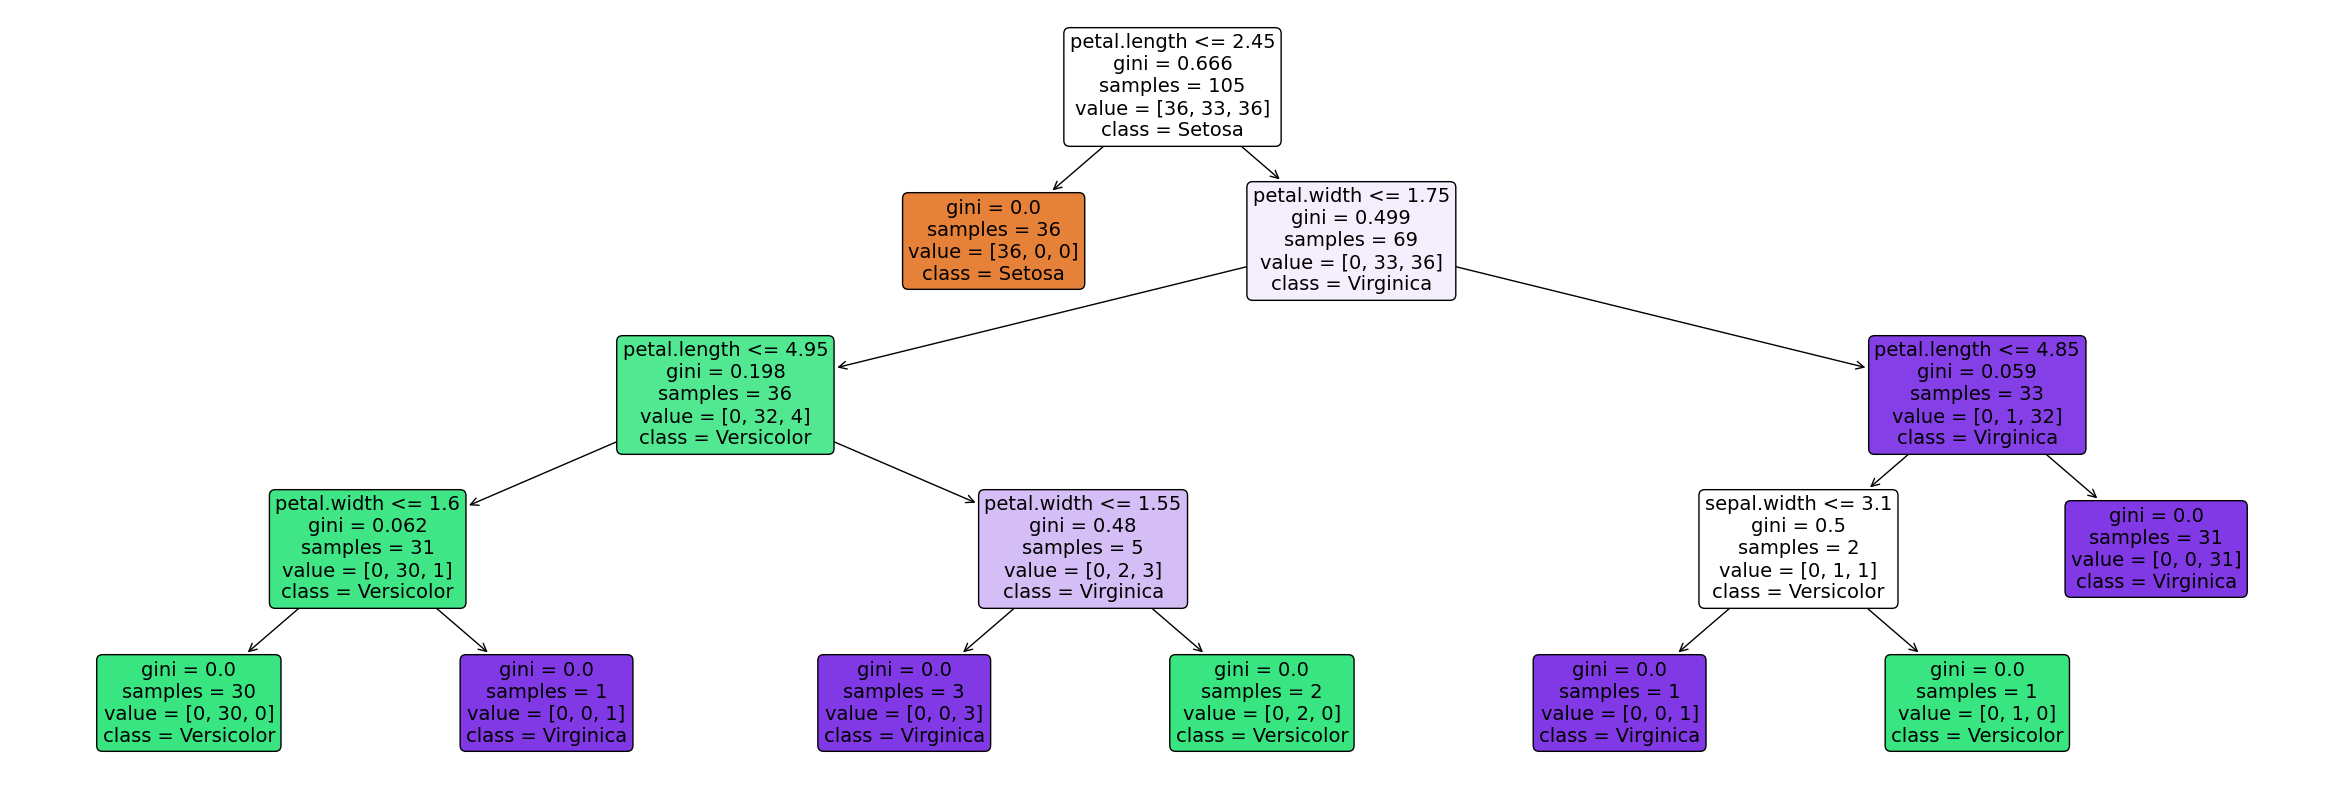

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
a = tree.plot_tree(model,
                   feature_names = X.columns,
                   class_names = Y.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [31]:
wine=pd.read_csv("C:\\Users\\Admin\\Downloads\\winequality-red.csv",sep=";")

In [32]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [39]:
X = wine.drop('quality',axis=1)
Y = wine['quality']

In [26]:
wine.shape

(1599, 1)

In [27]:
wine.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [40]:
wine['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [30]:
wine.describe

<bound method NDFrame.describe of      fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1      7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2     7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3     11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4      7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                              

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [42]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [43]:
print(confusion_matrix(Y_test,Y_pred))

[[  0   2   0   0   0   0]
 [  1   1   8   4   2   0]
 [  0   3 147  54   6   0]
 [  0   3  38 114  28   0]
 [  0   2   7  21  28   0]
 [  0   0   0   7   4   0]]


In [44]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.06      0.07        16
           5       0.73      0.70      0.72       210
           6       0.57      0.62      0.60       183
           7       0.41      0.48      0.44        58
           8       0.00      0.00      0.00        11

    accuracy                           0.60       480
   macro avg       0.30      0.31      0.31       480
weighted avg       0.59      0.60      0.60       480



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print(accuracy_score(Y_test,Y_pred))

0.6041666666666666


In [46]:
from sklearn.tree import export_text

In [47]:
X_train.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [48]:
modeltext = export_text(model,feature_names=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],)

In [49]:
print(modeltext)

|--- alcohol <= 9.85
|   |--- total sulfur dioxide <= 98.50
|   |   |--- sulphates <= 0.57
|   |   |   |--- total sulfur dioxide <= 88.50
|   |   |   |   |--- alcohol <= 9.08
|   |   |   |   |   |--- pH <= 3.34
|   |   |   |   |   |   |--- citric acid <= 0.55
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- citric acid >  0.55
|   |   |   |   |   |   |   |--- fixed acidity <= 12.45
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- fixed acidity >  12.45
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- pH >  3.34
|   |   |   |   |   |   |--- sulphates <= 0.51
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- sulphates >  0.51
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- alcohol >  9.08
|   |   |   |   |   |--- chlorides <= 0.08
|   |   |   |   |   |   |--- volatile acidity <= 0.42
|   |   |   |   |   |   |   |--- chlorides <= 0.07
|   |   |   |   |   |   |   |   |--- sulphates

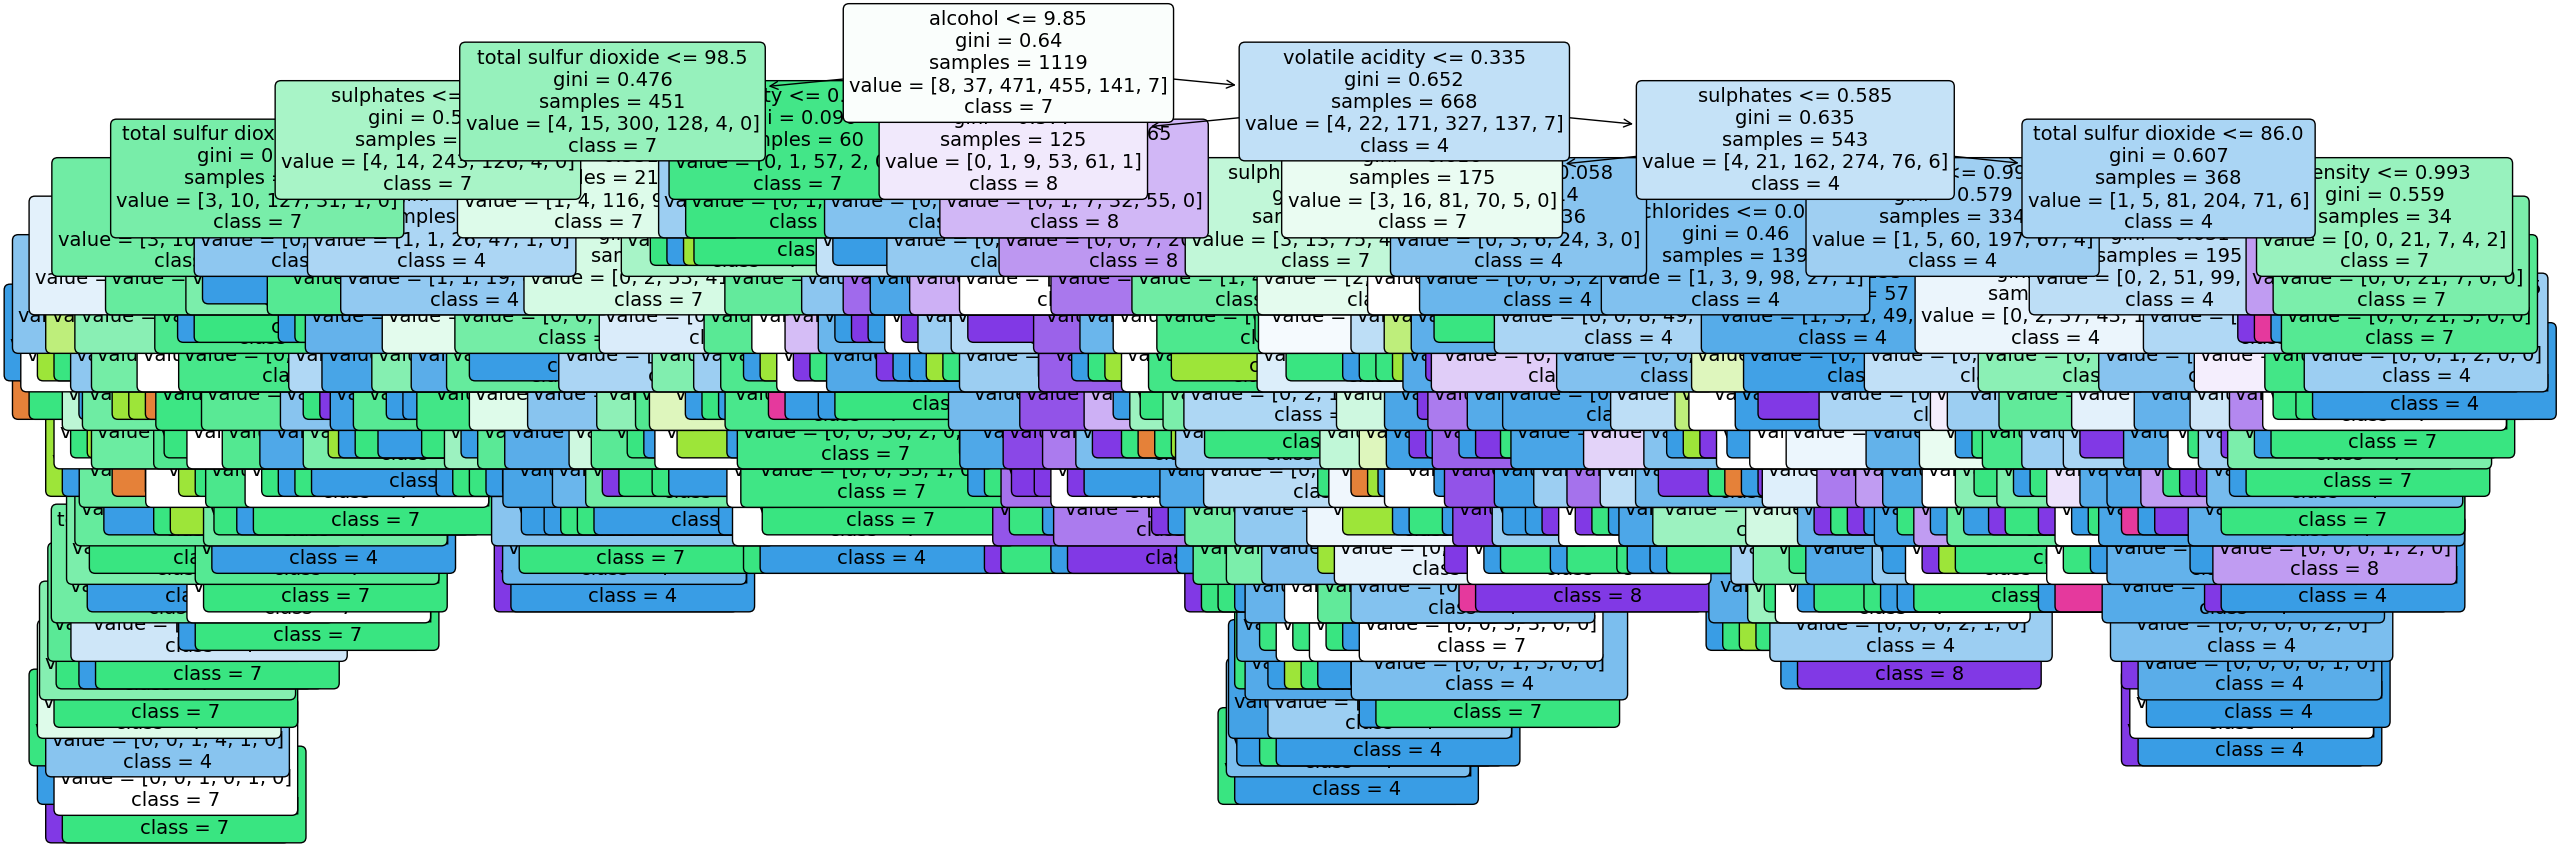

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
a = plot_tree(model,
                  feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
              class_names=['5', '6', '7', '4', '8', '3'],
              
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [51]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",header=None,sep="\s+")

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [53]:
df.columns = ['mpg',
'cylinders',
'displacement',
'horsepower',
'weight',
'acceleration',
'model',
'origin',
'car'
]